### Create half-gaussian meridional wind pulse 

* Spatially uniform wind stress applied in the meridional direction of the domain bahia_01_noShelf (240x180 grid points).
* Generate meridional binary file for windstress.
* Gaussian pulse, e-fold of value `sigma`, max windstress of `max_tau`, centered in time around `center`
* In namelist `data`, variable `ExternalForcingCycle` should match `end_time*3600` (`end_time` in seconds) and `ExternalForcingPeriod` should be equal to `(end_time*3600)/nt`.
* If you are using this forcing file, your run should not exceed `end_time` hoursin simulation time because the forcing will start again after that time (E.g. if end_time is 10 hrs, a new wind event will start again after 10 hours). If you wish to run for longer, restart from pickup files and comment out the external frocing options in `data`.

In [1]:
20*3600/60

1200.0

In [15]:
import matplotlib.pyplot as plt
import numpy as np

### INPUT

Only change these values

In [43]:
## Gaussian pulse
deltat= 120
end_time = 45 # original 20 end time of records (hrs) - Should be the same as ExternalForcingCycle (in seconds) in data namelist
nt = 135 # number of wind records
t = np.linspace(0, end_time, nt) # time array of wind records
max_tau = 0.1 # original 0.1
sigma = 50 # original 1  
center = 24 # base 3.5 hr, faster 2.5 hr, slower 4.5
gauss = max_tau * np.exp(-((t-center)**2)/(2*sigma))
mask = t > center
gauss[mask] = 0

## Grid size
nx = 272 # domain bahia01_expand: 272
ny = 320 # domain bahia01_expand: 320  

# filename
run_desc = 'halfgauss45hr' # descriptive string to add to wind filename. 
                            # Final name is eg. zonal_halfgauss2p5hr_240x180.bin 

### Make wind stress array

This is your half gaussian pulse
0.0003151111598444442


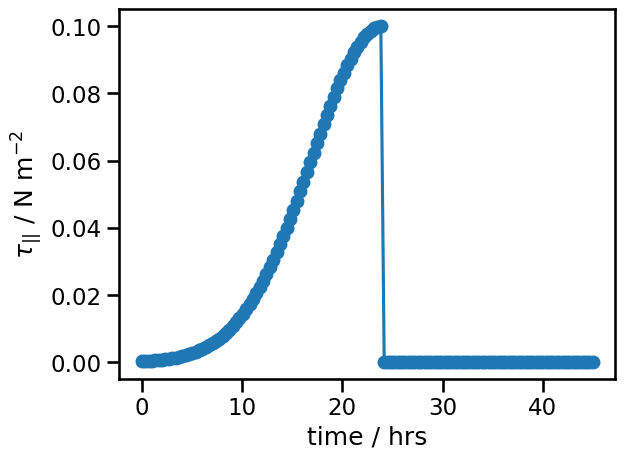

In [44]:
### Plot gaussian
plt.plot(t,gauss,'-o')
plt.xlabel('time / hrs')
plt.ylabel(r'$\tau_{||}$ / N m$^{-2}$')
file_path = "/Users/estebancruz/MITgcm/verification/BayIW/input/tau_simulation.png"
plt.savefig(file_path, dpi=300)
print('This is your half gaussian pulse')
print(gauss[0])

In [45]:
windstress= np.expand_dims(np.expand_dims(gauss,0),0) + np.zeros((nx,ny,nt))
alpha = np.radians(90) # Meridional winds directed to the north need 90deg rotation
#zonal_tau = windstress*np.cos(alpha)
merid_tau = windstress*np.sin(alpha)

In [46]:
### Write binary files
dt = np.dtype('>f8')  # float 64 big endian

wind_fname1 = 'merid_%s_%dx%d.bin' %(run_desc,nx,ny)
fileobj = open(wind_fname1, mode='wb')
dd=merid_tau.transpose((2,1,0))
dd.astype(dt).tofile(fileobj,"")
fileobj.close()

(11750400,)


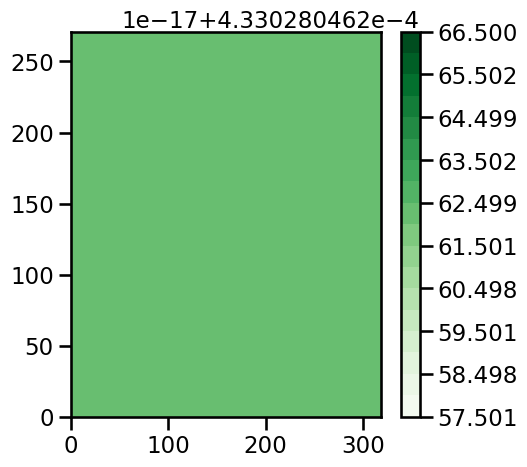

In [47]:
# Check that bin file works when read by MITgcm

cc=np.fromfile(wind_fname1, dtype=dt)
print(np.shape(cc))

bF=np.reshape(cc,[nx,ny,nt],'F') # F to read in Fortran order

fig,ax = plt.subplots(1,1, figsize=(5,5))

pc = ax.contourf(bF[:,:,2], 20, cmap='Greens')
plt.colorbar(pc,ax=ax)

(0.0, 45.0)

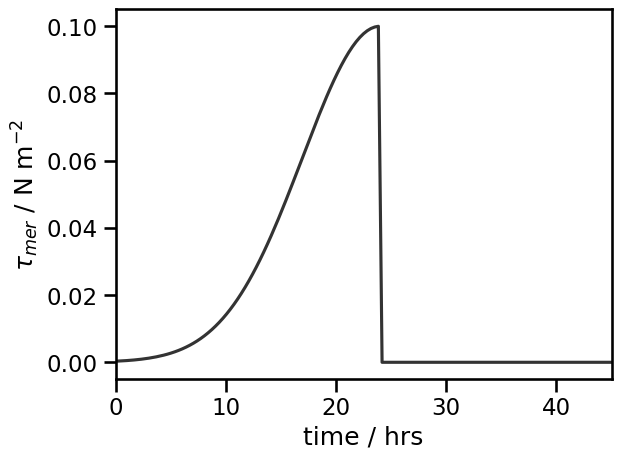

In [48]:
# Make a plot for talks
import seaborn as sns

sns.set_context('talk')
plt.plot(t, gauss, '-', color='0.2')
plt.xlabel('time / hrs')
plt.ylabel(r'$\tau_{mer}$ / N m$^{-2}$')
plt.xlim(0,end_time)

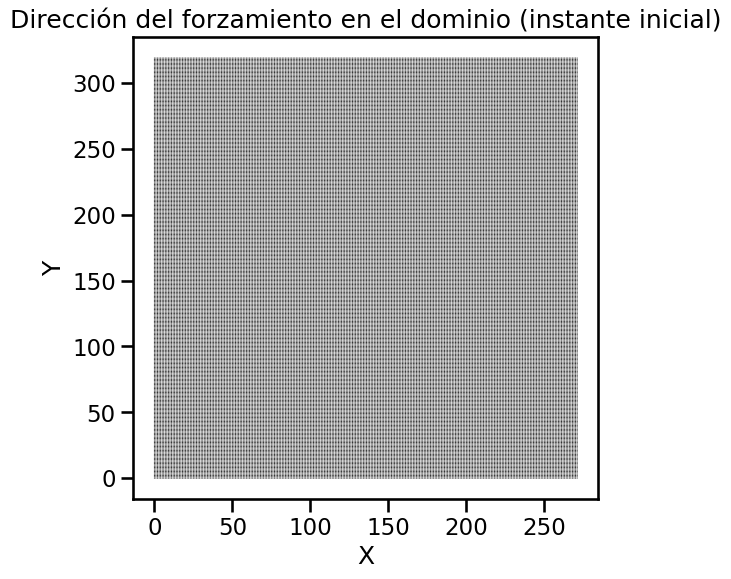

In [49]:
# Supongamos que tienes zonal_tau y merid_tau
X, Y = np.meshgrid(np.arange(nx), np.arange(ny))
U = np.zeros_like(windstress[:,:,0])  # zonal_tau debería ser cero
V = merid_tau[:,:,2]  # Primer instante de tiempo

plt.figure(figsize=(6,6))
plt.quiver(X, Y,U, V, scale=10)
plt.title("Dirección del forzamiento en el dominio (instante inicial)")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()




In [50]:
72000/3600

20.0

In [51]:
45*3600

162000

In [32]:
help(plt.quiver)

Help on function quiver in module matplotlib.pyplot:

quiver(*args, data=None, **kwargs) -> 'Quiver'
    Plot a 2D field of arrows.

    Call signature::

      quiver([X, Y], U, V, [C], **kwargs)

    *X*, *Y* define the arrow locations, *U*, *V* define the arrow directions, and
    *C* optionally sets the color.

    **Arrow length**

    The default settings auto-scales the length of the arrows to a reasonable size.
    To change this behavior see the *scale* and *scale_units* parameters.

    **Arrow shape**

    The arrow shape is determined by *width*, *headwidth*, *headlength* and
    *headaxislength*. See the notes below.

    **Arrow styling**

    Each arrow is internally represented by a filled polygon with a default edge
    linewidth of 0. As a result, an arrow is rather a filled area, not a line with
    a head, and `.PolyCollection` properties like *linewidth*, *edgecolor*,
    *facecolor*, etc. act accordingly.


    Parameters
    ----------
    X, Y : 1D or 2D array-l

In [33]:
1200/60

20.0

In [34]:
print(t)

[ 0.          0.76271186  1.52542373  2.28813559  3.05084746  3.81355932
  4.57627119  5.33898305  6.10169492  6.86440678  7.62711864  8.38983051
  9.15254237  9.91525424 10.6779661  11.44067797 12.20338983 12.96610169
 13.72881356 14.49152542 15.25423729 16.01694915 16.77966102 17.54237288
 18.30508475 19.06779661 19.83050847 20.59322034 21.3559322  22.11864407
 22.88135593 23.6440678  24.40677966 25.16949153 25.93220339 26.69491525
 27.45762712 28.22033898 28.98305085 29.74576271 30.50847458 31.27118644
 32.03389831 32.79661017 33.55932203 34.3220339  35.08474576 35.84745763
 36.61016949 37.37288136 38.13559322 38.89830508 39.66101695 40.42372881
 41.18644068 41.94915254 42.71186441 43.47457627 44.23728814 45.        ]
